In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

%matplotlib inline

In [2]:
base_dir = 'data/raw'
os.listdir(base_dir)

['salts_water_basic_IR_baseline.csv',
 '.DS_Store',
 'salts_water_basic_output_i.csv',
 'salts_water_basic_IR.csv',
 'salts_water_basic_output_s.csv',
 'salts_water_basic_OA.csv']

In [74]:
filename = 'salts_water_basic_IR.csv'
df = pd.read_csv(f'{base_dir}/{filename}')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,4497.44979,4495.52121,4493.59263,4491.66404,4489.73546,4487.80688,4485.8783,4483.94972,4482.02114,4480.09256,...,416.57339,414.64481,412.71623,410.78765,408.85907,406.93049,405.00191,403.07333,401.14475,399.21617
0,0.00142,0.001400,0.001360,0.001350,0.00136,0.00134,0.00135,0.00140,0.00144,0.001420,...,0.53442,0.53061,0.52513,0.52670,0.53566,0.53929,0.53607,0.53915,0.54905,0.54504
1,0.00109,0.000996,0.000917,0.000957,0.00104,0.00107,0.00107,0.00109,0.00109,0.000991,...,0.52883,0.52981,0.52910,0.52873,0.53103,0.53542,0.53922,0.53902,0.53531,0.53424
2,0.00157,0.001530,0.001490,0.001440,0.00143,0.00145,0.00146,0.00148,0.00154,0.001580,...,0.54737,0.54618,0.54446,0.54205,0.53840,0.53555,0.53451,0.52978,0.52092,0.52259
3,0.00166,0.001650,0.001630,0.001600,0.00157,0.00154,0.00146,0.00137,0.00137,0.001390,...,0.53496,0.53650,0.53775,0.54071,0.54612,0.55033,0.55296,0.55570,0.55485,0.54374
4,0.00164,0.001620,0.001560,0.001550,0.00158,0.00159,0.00158,0.00156,0.00155,0.001550,...,0.53901,0.53915,0.54188,0.54435,0.54564,0.54621,0.54677,0.54823,0.54811,0.54488


In [4]:
filename = 'salts_water_basic_output_i.csv'
outputs = pd.read_csv(f'{base_dir}/{filename}')
outputs = outputs.drop(columns=['Unnamed: 0'])
outputs = outputs.drop(index=[0])
outputs.index -=1
outputs = outputs.sort_index()
outputs.head()

,Zn,Cu,Li,Fe,Ni,NH4,SO4,NO3
0,0.0,0.0,0.0,0.0,0.0000,0.1452,0.05005,0.0451
1,0.0,0.0,0.0,0.0,0.0000,0.2904,0.10010,0.0902
2,0.0,0.0,0.0,0.0,0.0000,0.4356,0.15015,0.1353
3,0.0,0.0,0.0,0.0,0.0000,0.5808,0.20020,0.1804
4,0.0,0.0,0.0,0.0,0.2431,0.0000,0.24310,0.0000


In [5]:
df.shape, outputs.shape

((3744, 911), (3744, 8))

In [6]:
zn_df = outputs[outputs['Zn'] == 0]
cu_df = outputs[outputs['Cu'] == 0]
li_df = outputs[outputs['Li'] == 0]
fe_df = outputs[outputs['Fe'] == 0]
ni_df = outputs[outputs['Ni'] == 0]
nh4_df  = outputs[outputs['NH4'] == 0]
so4_df  = outputs[outputs['SO4'] == 0]
no3_df  = outputs[outputs['NO3'] == 0]
zn_df.shape, cu_df.shape, li_df.shape, fe_df.shape, ni_df.shape, nh4_df.shape, so4_df.shape, no3_df.shape

((1371, 8),
 (1371, 8),
 (1371, 8),
 (1371, 8),
 (1371, 8),
 (1371, 8),
 (383, 8),
 (4, 8))

In [7]:
x = np.array(df.columns)
x = np.apply_along_axis(lambda el: np.float64(el), 0, x)
x.shape

(911,)

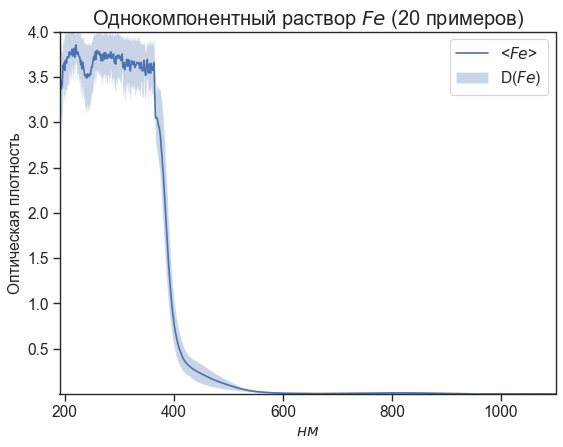

In [10]:
cations = (outputs['Fe'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std
y2 = mean + std

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, mean, label='<$Fe$>') 
plt.fill_between(x, y1, y2, alpha=0.3, label='D($Fe$)')
plt.ylim([0.001, 4])
plt.xlim([x[0], x[-1]])
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('$нм$', fontsize=14)
plt.ylabel('Оптическая плотность', fontsize=14)

plt.title(f'Однокомпонентный раствор $Fe$ ({y.shape[0]} примеров)',fontsize=18)
#plt.savefig('images/oa/Fe.jpeg', dpi=80, format='jpeg')
plt.show()

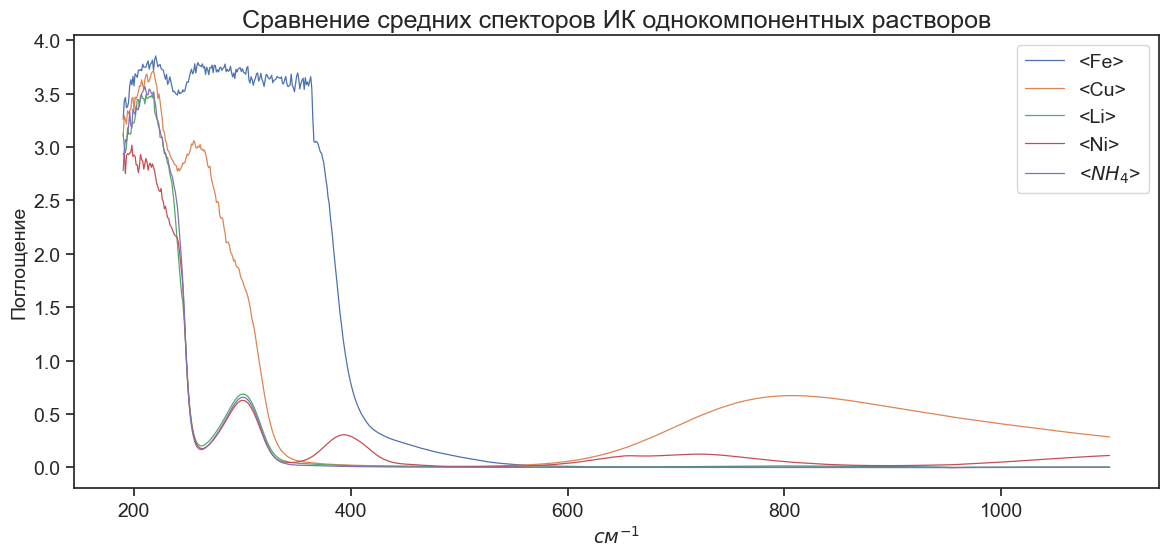

In [15]:
plt.figure(figsize=(14, 6), dpi=100)

cations = (outputs['Fe'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
plt.plot(x, df[cations].mean(), label='<Fe>',linewidth=0.9) 

cations = (outputs['Fe'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
plt.plot(x, df[cations].mean(), label='<Cu>',linewidth=0.9) 

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
plt.plot(x, df[cations].mean(), label='<Li>',linewidth=0.9) 

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
plt.plot(x, df[cations].mean(), label='<Ni>',linewidth=0.9) 

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
plt.plot(x, df[cations].mean(), label='<$NH_4$>', linewidth=0.9) 

#plt.plot(x, baseline.mean(), label='$H_2O$', linewidth=2)


#plt.ylim([0.001, 0.55])
#plt.xlim([x[-1], x[0]])
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('$см^{-1}$', fontsize=14)
plt.ylabel('Поглощение', fontsize=14)

plt.title(f'Сравнение средних спекторов ИК однокомпонентных растворов',fontsize=18)
#plt.savefig('images/ir/solutions_comparing.jpeg', dpi=80, format='jpeg')
plt.show()

### PCA and Corr analysis

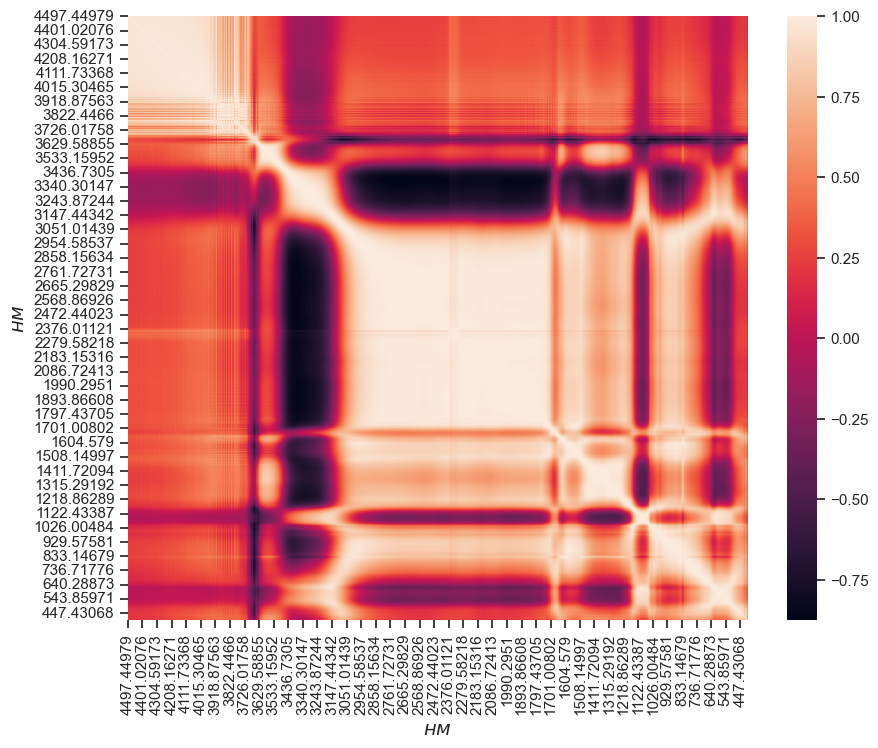

In [57]:
cations = (outputs['Fe'] != 0) & (outputs['Cu']== 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)

corr = df.corr()
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(corr, xticklabels=50, yticklabels=50)
plt.xlabel('$нм$', fontsize=14)
plt.ylabel('$нм$', fontsize=14)
plt.show()

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2'])
principalDf.head()

,pc 1,pc 2
0,-0.885612,-0.663553
1,-0.815335,-0.633471
2,-0.760115,-0.516294
3,-0.676122,-0.424024
4,-0.988512,-0.448618


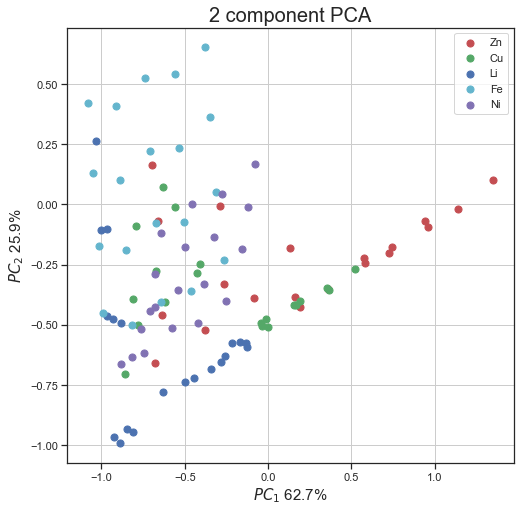

In [76]:
fig = plt.figure(figsize = (8,8))
cov = pca.explained_variance_ratio_

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'$PC_1$ {cov[0]*100:.1f}%', fontsize = 15)
ax.set_ylabel(f'$PC_2$ {cov[1]*100:.1f}%', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
c = ['r', 'g', 'b', 'c', 'm']

cations = (outputs['Fe'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[0], s=50, label='Fe')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[1], s=50, label='Cu')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[2], s=50, label='Li')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[3], s=50, label='Ni')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
dat = principalDf[cations]
x, y = dat['pc 1'], dat['pc 2']
ax.scatter(x,y, c=c[4], s=50, label='NH4')
ax.legend(targets)
plt.savefig('images/ir/pca2.jpeg', dpi=80, format='jpeg')
ax.grid()

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2', 'pca 3'])
principalDf.head()

,pc 1,pc 2,pca 3
0,-0.885612,-0.663553,0.048932
1,-0.815335,-0.633471,0.094657
2,-0.760115,-0.516294,0.075150
3,-0.676122,-0.424024,0.089860
4,-0.988512,-0.448618,0.007199


/var/folders/_j/kkrbjs8x17d4gnh05zpxgjyc0000gn/T/ipykernel_15300/176040314.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d', elev=20, azim=160)


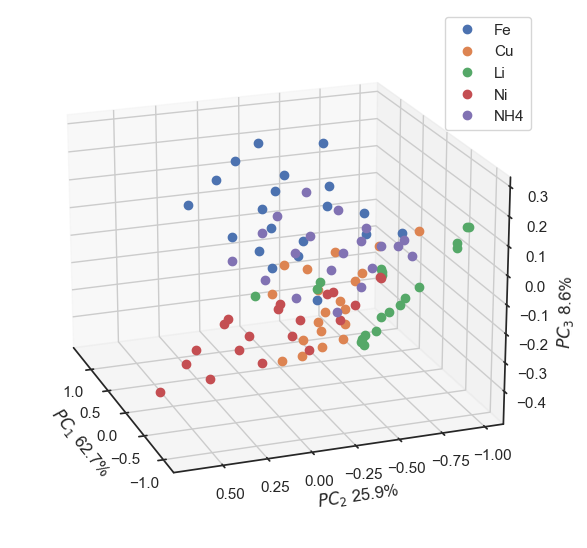

In [78]:
cov = pca.explained_variance_ratio_
fig = plt.figure(figsize=(12, 7), dpi=100)
ax = fig.gca(projection='3d', elev=20, azim=160)

cations = (outputs['Fe'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Fe')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Cu')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Li')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='Ni')

cations = (outputs['Fe'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
dat = principalDf[cations]
ax.plot(dat.iloc[:, 0], dat.iloc[:, 1], dat.iloc[:, 2], 'o', label='NH4')

ax.set_xlabel(f'$PC_1$ {cov[0]*100:.1f}%')
ax.set_ylabel(f'$PC_2$ {cov[1]*100:.1f}%')
ax.set_zlabel(f'$PC_3$ {cov[2]*100:.1f}%')
ax.legend()
plt.savefig('images/ir/pca3.jpeg', dpi=80, format='jpeg')
plt.show()